# Project Name: Springleaf- Which customers will respond to direct mail 

# Group 4

015002 - Anuksha Jain 

015005 - Ayushi Gupta

015015 - Aniket Nandy


015025 - Biswadip Das


015045 - Siddharth Gupta

In [1]:
#Importing Libraries
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Display output from multiple commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# for data splitting
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

# One hot encode categorical data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder as onehot
# Scale numeric data
from sklearn.preprocessing import StandardScaler
## Transformer for target: Label encode target column
from sklearn.preprocessing import LabelEncoder

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv.zip',
 'test.csv.zip',
 'train.csv',
 'train.csv.zip',
 'Which_customer_will_respond_to_direct_mails.ipynb',
 'Which_customer_will_respond_to_direct_mails_25Aug_latest.ipynb']

In [6]:
import zipfile
# read the dataset using the compression zip
df=pd.read_csv("train.csv.zip",compression='zip')


In [7]:
df.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145231 entries, 0 to 145230
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 2.1+ GB


In [9]:
df.describe()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
count,145231.000000,145231.000000,145231.000000,1.452310e+05,145175.000000,145175.00000,145175.000000,145175.000000,145175.000000,145175.000000,...,145231.000000,145231.000000,145231.000000,145231.000000,1.452310e+05,145231.000000,145231.000000,145231.000000,145231.000000,145231.000000
mean,145124.981808,105.278040,88.492285,3.721946e+03,0.693907,0.51316,0.693907,0.494493,0.476763,1.447598,...,0.549965,86.664369,89.828762,914.417259,9.904497e+08,922.938505,936.487905,9942.162279,8849.839111,0.232547
std,83890.290627,143.351237,125.903323,1.228001e+04,1.604578,1.17531,1.604578,1.115085,1.000755,1.132784,...,6.361312,31.347700,26.928221,276.361514,9.725818e+07,212.087416,210.370833,743.153332,3175.797333,0.422457
min,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,72342.500000,24.000000,13.000000,1.790000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
50%,145272.000000,60.000000,55.000000,2.500000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
75%,217686.500000,132.000000,120.000000,3.600000e+03,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
max,290463.000000,999.000000,999.000000,2.200000e+06,68.000000,66.00000,68.000000,67.000000,35.000000,39.000000,...,99.000000,99.000000,99.000000,999.000000,1.000000e+09,999.000000,999.000000,9999.000000,9999.000000,1.000000


In [10]:
df.shape

(145231, 1934)

In [11]:
df.memory_usage().sum() # Memory used In Bytes

2247014160

In [12]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [19]:
# Print number of null values in each column
df.isnull().sum()

ID               0
VAR_0001         0
VAR_0002         0
VAR_0003         0
VAR_0004         0
VAR_0005         0
VAR_0006        56
VAR_0007        56
VAR_0008        56
VAR_0009        56
VAR_0010        56
VAR_0011        56
VAR_0012        56
VAR_0013        56
VAR_0014        56
VAR_0015        56
VAR_0016        56
VAR_0017        56
VAR_0018        56
VAR_0019        56
VAR_0020        56
VAR_0021        56
VAR_0022        56
VAR_0023        56
VAR_0024        56
VAR_0025        56
VAR_0026        56
VAR_0027        56
VAR_0028        56
VAR_0029        56
VAR_0030        56
VAR_0031        56
VAR_0032        56
VAR_0033        56
VAR_0034        56
VAR_0035        56
VAR_0036        56
VAR_0037        56
VAR_0038        56
VAR_0039        56
VAR_0040        56
VAR_0041        56
VAR_0042        56
VAR_0043        56
VAR_0044        56
VAR_0045        56
VAR_0046        56
VAR_0047        56
VAR_0048        56
VAR_0049        56
VAR_0050        56
VAR_0051        56
VAR_0052    

In [20]:
cat_feature = []
num_feature = []

#Criteria: If feature has <=15 unique values it will be considered as catagorical
for feature in df.columns:
    
    if df[feature].nunique()<=15:
        cat_feature.append(feature)
    elif df[feature].nunique()>=15:
        num_feature.append(feature)       

In [25]:
#Number of Catagorical Features
len(cat_feature)

639

In [26]:
#Number of Numerical Features
len(num_feature)

1295

In [29]:
#To print unique values of catagorical featured (having<=15 unique values)
for feature in cat_feature:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('Unique values:',df[feature].unique())


 
************* Column name: VAR_0001 *************
Unique values: ['H' 'R' 'Q']

 
************* Column name: VAR_0005 *************
Unique values: ['C' 'B' 'N' 'S']

 
************* Column name: VAR_0008 *************
Unique values: [False nan]

 
************* Column name: VAR_0009 *************
Unique values: [False nan]

 
************* Column name: VAR_0010 *************
Unique values: [False nan]

 
************* Column name: VAR_0011 *************
Unique values: [False nan]

 
************* Column name: VAR_0012 *************
Unique values: [False nan]

 
************* Column name: VAR_0018 *************
Unique values: [ 0. nan]

 
************* Column name: VAR_0019 *************
Unique values: [ 0. nan]

 
************* Column name: VAR_0020 *************
Unique values: [ 0. nan]

 
************* Column name: VAR_0021 *************
Unique values: [ 0. nan]

 
************* Column name: VAR_0022 *************
Unique values: [ 0. nan]

 
************* Column name: VAR_0023 ***

In [31]:
# missing values in %
percent_missing = 100* df.isnull().sum()/len(df)
percent_missing

ID            0.000000
VAR_0001      0.000000
VAR_0002      0.000000
VAR_0003      0.000000
VAR_0004      0.000000
VAR_0005      0.000000
VAR_0006      0.038559
VAR_0007      0.038559
VAR_0008      0.038559
VAR_0009      0.038559
VAR_0010      0.038559
VAR_0011      0.038559
VAR_0012      0.038559
VAR_0013      0.038559
VAR_0014      0.038559
VAR_0015      0.038559
VAR_0016      0.038559
VAR_0017      0.038559
VAR_0018      0.038559
VAR_0019      0.038559
VAR_0020      0.038559
VAR_0021      0.038559
VAR_0022      0.038559
VAR_0023      0.038559
VAR_0024      0.038559
VAR_0025      0.038559
VAR_0026      0.038559
VAR_0027      0.038559
VAR_0028      0.038559
VAR_0029      0.038559
VAR_0030      0.038559
VAR_0031      0.038559
VAR_0032      0.038559
VAR_0033      0.038559
VAR_0034      0.038559
VAR_0035      0.038559
VAR_0036      0.038559
VAR_0037      0.038559
VAR_0038      0.038559
VAR_0039      0.038559
VAR_0040      0.038559
VAR_0041      0.038559
VAR_0042      0.038559
VAR_0043   

In [32]:
# Calculating how many features have more than 10% of data missing them
np.sum(percent_missing > 10)

24

In [33]:
# Calculating how many features have more than 10% of data missing them
np.sum(percent_missing > 50)

24

In [34]:
# Remove these 24 features,as these have more than 50% data missing
missing = [feature for feature in df.columns if percent_missing[feature] > 50]
df.drop(missing, axis=1, inplace=True)

In [35]:
df.shape

(145231, 1910)

In [36]:
remove_missing_examples = [feature for feature in df.columns if percent_missing[feature] < 1]
fill_missing_examples = [feature for feature in df.columns if percent_missing[feature] > 1]

In [37]:
# filling in the missing data for features containing many of them
for col in fill_missing_examples:
    if col in cat_feature:
        # fill missing data with mode
        df[col].fillna(df[col].mode(), inplace=True)
    else:
        # fill missing data with mean
        df[col].fillna(df[col].mean(), inplace=True)

# removing rows with missing data in them (only a few examples will be deleted at this point)
df.dropna(axis=0, inplace=True)

In [38]:
df.shape

(144262, 1910)

In [39]:
# final check for missing data
df.isnull().sum().max()

0

In [40]:
df.tail()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
145225,290454,R,24,34,3944,N,1.0,1.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,1
145226,290457,H,276,144,3000,C,2.0,3.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
145227,290458,R,39,414,2821,C,3.0,1.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
145228,290459,R,103,31,2604,B,1.0,1.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
145230,290463,H,228,120,18500,B,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0


In [42]:
count_unique_values = df.nunique(dropna=False).sort_values()
np.sum(count_unique_values == 1)

53

In [43]:
#find features that have constant values only
constantfeatures = [features for features in df.columns if count_unique_values[features] == 1]

In [44]:
print("Number of Constant features are:")
print(len(constantfeatures)) #such features do not provide any information and only make our dataset larger.

Number of Constant features are:
53


In [45]:
# Removing features with constant values
df.drop(constantfeatures, axis=1, inplace=True)

In [46]:
df.shape

(144262, 1857)

In [47]:
print(df.duplicated().sum()) # no. Of duplicate rows

0


In [48]:
cat_b = []
num_b = []

#Criteria: If feature has <=15 unique values it will be considered as catagorical
for feature in df.columns:
    
    if df[feature].nunique()<=15:
        cat_b.append(feature)
    elif df[feature].nunique()>=15:
        num_b.append(feature)    

In [49]:
len(cat_b)

582

In [50]:
len(num_b)

1275

## Use Sample of Data

In [73]:
# reduce size of data to prevent kernel crashes
SAMPLE_SIZE = 2000
rand_idx = np.random.randint(0, len(df), size=SAMPLE_SIZE)
sampledf = df.iloc[rand_idx,]
sampledf.shape

(2000, 1857)

In [74]:
corr=sampledf.corr()
corr['target'].sort_values(ascending=False).head(10)

target      1.000000
VAR_0145    0.237653
VAR_0121    0.230856
VAR_0144    0.226558
VAR_0120    0.223871
VAR_0105    0.223834
VAR_0104    0.217242
VAR_0103    0.214171
VAR_0119    0.212787
VAR_0143    0.211109
Name: target, dtype: float64

In [75]:
corr['target'].sort_values(ascending = False,na_position ='first').tail(10)

VAR_0892   -0.154204
VAR_0898   -0.154517
VAR_0884   -0.155497
VAR_0810   -0.155586
VAR_0805   -0.155588
VAR_0800   -0.155589
VAR_0895   -0.156880
VAR_0907   -0.163732
VAR_0540   -0.186483
VAR_0886   -0.202402
Name: target, dtype: float64

<Figure size 1080x1080 with 0 Axes>

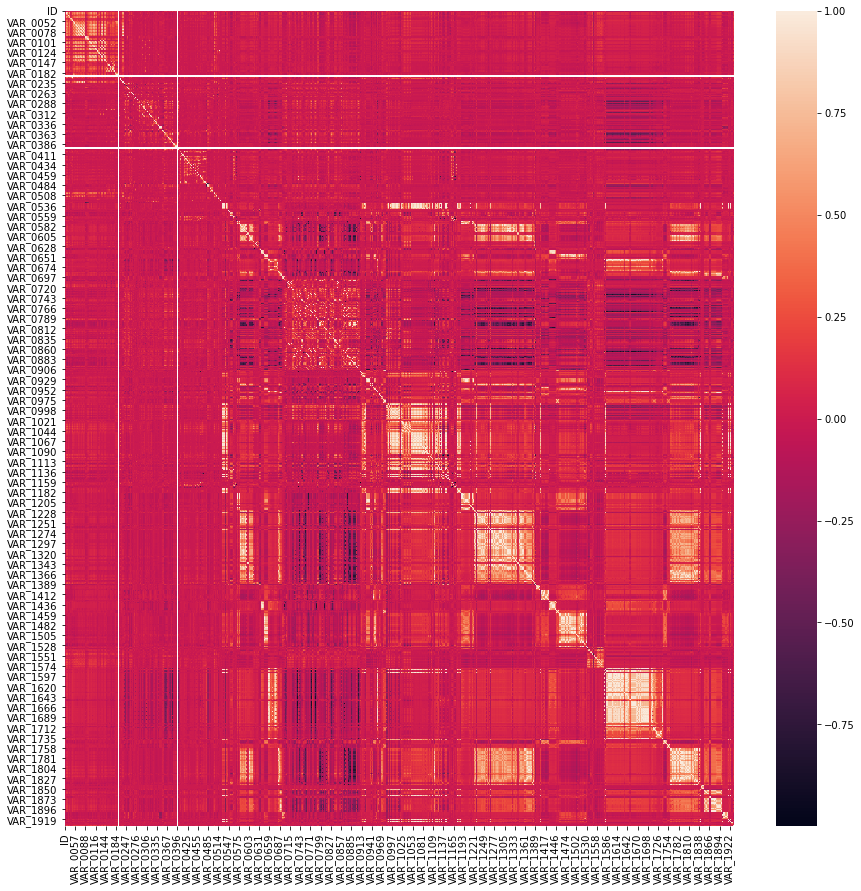

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(corr)

In [63]:
sampledf['target'].unique()

array([0, 1], dtype=int64)

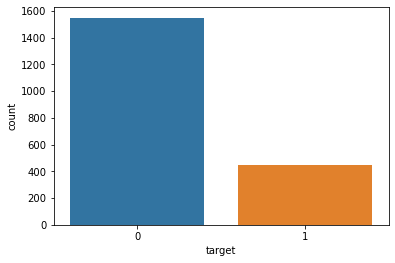

In [64]:
sns.countplot(sampledf.target)

In [65]:
print(round(sampledf.target.value_counts() *100/ sampledf.target.count(),2))

0    77.45
1    22.55
Name: target, dtype: float64


In [66]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(sampledf['target'].unique(), np.bincount(sampledf.target))}))

Sample counts per class:
{0: 1549, 1: 451}


In [67]:
#  Popout target to separate predictors and target

y = sampledf.pop('target')

# Create an alias of predictors dataset 
X = sampledf     
X.shape
y.shape

(2000, 1856)

(2000,)

In [68]:
#Splitting data into train and test data
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2,random_state=10      # split-ratio
                                                    )

In [69]:
#Making a copy of data
X_train_c = X_train.copy()
X_test_c  = X_test.copy()

In [70]:
ohe = onehot(sparse = False)
for x in cat_feature:
    ohe.fit_transform(X_train_c[x])

ValueError: Expected 2D array, got 1D array instead:
array=['R' 'R' 'R' ... 'R' 'H' 'H'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
X_train_c['VAR_0001'].reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# To store column types
coltypes = {}

# A Function to reduce memory
# DataFrame must not have NULLs

def reduce_memory_usage(df):
    # This function iterate through all the columns of a dataframe and modify the data type to reduce memory usage. 
        
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    coltypes[col] = np.int8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    coltypes[col] = np.int16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    coltypes[col] = np.int32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) 
                    coltypes[col] = np.int64  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    coltypes[col] = np.float16
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    coltypes[col] = np.float32
                else:
                    df[col] = df[col].astype(np.float64)
                    coltypes[col] = np.float64
        else:
            df[col] = df[col].astype('category')
            coltypes[col] = 'category'

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df,coltypes

In [ ]:
# Reduce memory usage For not null columns

#%%time

# Apply reduce_mem_usage()
maildf,feat_types = reduce_memory_usage(sampledf)

In [ ]:
feat_types

In [ ]:
maildf.head()

We are getting error in Encoding and even after trying a lot not able to resolve error